# 1. Loading data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1. Firstly we load the data and filter the columns.

In [5]:
df = pd.read_csv("../../data/source/Moriarty2.csv",
                  usecols=["UUID","ActionType"])

df2 = pd.read_csv("/home/itsquall/Descargas/T4.csv", 
                  usecols=["UUID", "Total_CPU", "Traffic_TotalTxBytes", "processes", "MemFree", "SwapFree"])

## 1.2. Merging the two datasets.

The first thing we need to do it is to convert column 'UUID' (which is a timestamp in milliseconds) into a date timestamp.

In [6]:
df['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df['UUID'] = df['UUID'].dt.round('t')


df2['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df2['UUID'] = df['UUID'].dt.round('t')

Merge the two datasheets on the column to set the desired combinations.

In [7]:
data = pd.merge(df,df2, on=['UUID'])

## 1.3. Replace ActionType.

We need numeric values in the columns, so we replace ActionType malicious/benign by 1/0 respectively. And finally we don't need column 'UUID' for the predicting model so we remove it.

In [8]:
data['ActionType'] = data['ActionType'].replace(['malicious'], 1)
data['ActionType'] = data['ActionType'].replace(['benign'], 0)
data = data.drop('UUID', 1)

y = data['ActionType']

data = data.drop('ActionType', 1)


# 2. PCA

## 2.1 Scalation

In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(data)

## 2.2 Modelling

In [10]:
from sklearn.decomposition import PCA
n_components = 3
estimator = PCA(n_components)
X_pca = estimator.fit_transform(datanorm)

print(estimator.explained_variance_ratio_.cumsum())

[0.31286092 0.562587   0.75085657]


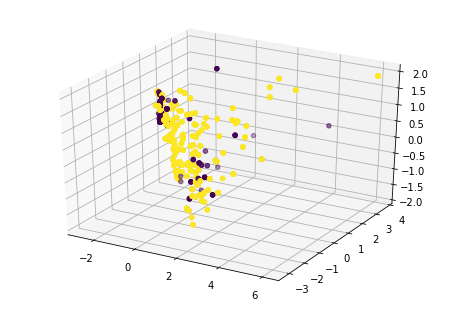

In [11]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n_components = 2
estimator_plot = PCA(n_components)
X_pca_plot = estimator.fit_transform(datanorm)

fig = plt.figure()
plt.scatter(X_pca_plot[:, 0], X_pca_plot[:, 1], c=y.values)
ax = Axes3D(fig)
x_pca = X_pca_plot[:,0]
y_pca = X_pca_plot[:,1]
z_pca = X_pca_plot[:,2]
ax.scatter(x_pca,y_pca,z_pca, c=y.values)
plt.show()

# 3. KNN Classification.

## 3.1 Split data on train data and test data.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datanorm, y, test_size=0.3)

## 3.2 Apply KNN Classification.

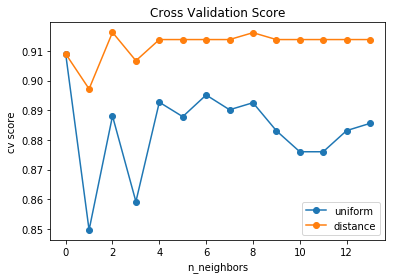

In [15]:
from sklearn import neighbors

for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,15):
        
        # Instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train,y_train)
        
        
        # Cross-validation Score
        
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')
        total_scores.append(scores.mean())
    
    plt.plot(range(0,len(total_scores)), total_scores, 
             marker='o', label=weights)
    plt.title('Cross Validation Score')
    plt.ylabel('cv score')
    plt.xlabel('n_neighbors')
    plt.legend()